In [37]:
from matplotlib import pyplot as plt
import numpy as np

In [38]:
import time

In [39]:
# log = """1/25 - 1067/1067 - loss: 0.023111509159207344, F1 micro: 0.007277296390384436, acc: 0.004306872375309467,  elapesed_time: 0:24:56.158403
# 535/535 - val loss: 0.018307387828826904, val F1 micro: 0.06729401648044586 val acc: 0.037991102784872055
# Best model saved
# --------------------------------------------------------------------------
# 2/25 - 1067/1067 - loss: 0.015916544944047928, F1 micro: 0.11638941615819931, acc: 0.06462511420249939,  elapesed_time: 0:25:24.037730
# 535/535 - val loss: 0.01528188493102789, val F1 micro: 0.23503564298152924 val acc: 0.148690387606620873
# Best model saved
# --------------------------------------------------------------------------
# 3/25 - 1067/1067 - loss: 0.01297577004879713, F1 micro: 0.30032622814178467, acc: 0.18976473808288574, elapesed_time: 0:26:18.301049
# 535/535 - val loss: 0.012682681903243065, val F1 micro: 0.4086923897266388 val acc: 0.300901889801025494
# Best model saved
# --------------------------------------------------------------------------
# 4/25 - 1067/1067 - loss: 0.010911955498158932, F1 micro: 0.4391660988330841, acc: 0.3071029782295227, , elapesed_time: 0:25:18.354542
# 535/535 - val loss: 0.012196512892842293, val F1 micro: 0.4548349976539612 val acc: 0.344020247459411677
# Best model saved
# --------------------------------------------------------------------------
# 5/25 - 1067/1067 - loss: 0.009406687691807747, F1 micro: 0.5368423461914062, acc: 0.4013955593109131,  elapesed_time: 0:25:22.937327
# 535/535 - val loss: 0.01079446729272604, val F1 micro: 0.5333125591278076 val acc: 0.422288119792938234
# Best model saved
# --------------------------------------------------------------------------
# 6/25 - 1067/1067 - loss: 0.008364308625459671, F1 micro: 0.6038662195205688, acc: 0.47323697805404663, elapesed_time: 0:25:15.265896
# 535/535 - val loss: 0.013603955507278442, val F1 micro: 0.48100417852401733 val acc: 0.39887571334838867
# --------------------------------------------------------------------------
# 7/25 - 1067/1067 - loss: 0.007294489070773125, F1 micro: 0.6592760682106018, acc: 0.5355072617530823,  elapesed_time: 0:25:19.064641
# 535/535 - val loss: 0.00957436952739954, val F1 micro: 0.6162675619125366 val acc: 0.52069431543350227
# Best model saved
# --------------------------------------------------------------------------
# 8/25 - 1067/1067 - loss: 0.006524345837533474, F1 micro: 0.7004850506782532, acc: 0.5862229466438293,  elapesed_time: 0:26:15.189241
# 535/535 - val loss: 0.010202383622527122, val F1 micro: 0.6034393906593323 val acc: 0.5050655007362366
# --------------------------------------------------------------------------
# 9/25 - 1067/1067 - loss: 0.005924425553530455, F1 micro: 0.7315306663513184, acc: 0.6258522272109985,  elapesed_time: 0:25:08.685548
# 535/535 - val loss: 0.01199615839868784, val F1 micro: 0.5681300163269043 val acc: 0.462070673704147345
# --------------------------------------------------------------------------"""

In [40]:
train_config = np.load('./training_configs/train_config_1595172221_mel_no_train.npy', allow_pickle=True).item()

In [41]:
# def get_losses_from_log(log):
#     losses = []
#     F1s = []
#     val_losses = []
#     val_F1s = []
#     for line in log.split('--------------------------------------------------------------------------'):
#         splited = line.split(' ')
#         print(splited)
#         losses.append(float(splited[5].replace(',', '')))
#         F1s.append(float(splited[8].replace(',', '')))
#         val_losses.append(float(splited[16].replace(',', '')))
#         val_F1s.append(float(splited[20].replace(',', '')))
#     return losses, F1s, val_losses, val_F1s
# losses, F1s, val_losses, val_F1s = get_losses_from_log(log)

In [42]:
losses = train_config['results']['losses']
F1s = train_config['results']['f1_score']
val_losses = train_config['results']['val_losses']
val_F1s = train_config['results']['val_f1_score']
min_idx = np.argmin(val_losses)
print(min_idx, val_F1s[min_idx], val_losses[min_idx])

14 0.6796473860740662 0.009430751204490662


In [43]:
# train_config['results']['losses'] = losses
# train_config['results']['val_losses'] = val_losses
# train_config['results']['f1_score'] = F1s
# train_config['results']['val_f1_score'] = val_F1s
# train_config

In [44]:
print(list(zip(val_F1s, val_losses)))

[(0.06729401648044586, 0.018307387828826904), (0.23503564298152924, 0.01528188493102789), (0.4086923897266388, 0.012682681903243065), (0.4548349976539612, 0.012196512892842293), (0.5333125591278076, 0.01079446729272604), (0.48100417852401733, 0.013603955507278442), (0.6162675619125366, 0.00957436952739954), (0.6034393906593323, 0.010202383622527122), (0.5681300163269043, 0.01199615839868784), (0.6498764157295227, 0.010030330158770084), (0.6062031984329224, 0.010854740627110004), (0.5987097024917603, 0.012018308974802494), (0.6644978523254395, 0.009969829581677914), (0.5594749450683594, 0.013673258945345879), (0.6796473860740662, 0.009430751204490662), (0.6438688039779663, 0.010611064732074738), (0.6719622611999512, 0.01009803730994463), (0.6543132066726685, 0.010747556574642658), (0.6858837008476257, 0.009630966931581497), (0.6543259024620056, 0.011099593713879585), (0.6510365605354309, 0.01131049171090126), (0.6323834657669067, 0.01234495360404253), (0.6786944270133972, 0.010339110158

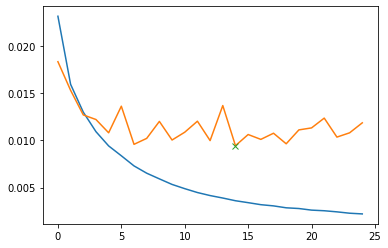

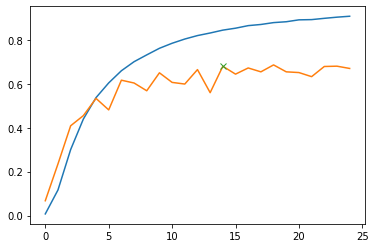

In [45]:
plt.plot(losses)
plt.plot(val_losses)
plt.plot(min_idx, val_losses[min_idx], marker='x')
plt.show()
plt.plot(F1s)
plt.plot(val_F1s)
plt.plot(min_idx, val_F1s[min_idx], marker='x')